# Аналитика в авиакомпании

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

*/datasets/query_1.csv* — результат первого запроса. В нём содержится информация о:

- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

*/datasets/query_3.csv* — результат третьего запроса. В нём содержится информация о:
- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

## Описание данных

База данных об авиаперевозках:

Таблица airports — информация об аэропортах:
- airport_code — трёхбуквенный код аэропорта
- airport_name — название аэропорта
- city — город
- timezone — временная зона

Таблица aircrafts — информация об самолётах:
- aircraft_code — код модели самолёта
- model — модель самолёта
- range — количество самолётов

Таблица tickets — информация о билетах:
- ticket_no — уникальный номер билета
- passenger_id — персональный идентификатор пассажира
- passenger_name — имя и фамилия пассажира

Таблица flights — информация о рейсах:
- flight_id — уникальный идентификатор рейса
- departure_airport — аэропорт вылета
- departure_time — дата и время вылета
- arrival_airport — аэропорт прилёта
- arrival_time — дата и время прилёта
- aircraft_code – id самолёта

Таблица ticket_flights — стыковая таблица «рейсы-билеты»
- ticket_no — номер билета
- flight_id — идентификатор рейса

Таблица festivals — информация о фестивалях
- festival_id — уникальный номер фестиваля
- festival_date — дата проведения фестиваля
- festival_city — город проведения фестиваля
- festival_name — название фестиваля

### Шаг 4. Аналитика средствами Python

In [1]:
#необходимоые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st
import seaborn as sns
from IPython.display import display
import numpy as np

In [2]:
model_flights = pd.read_csv('/datasets/query_1.csv')
display(model_flights)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
city_flights = pd.read_csv('/datasets/query_3.csv')
display(city_flights)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [5]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
city_flights.isna().sum()

city               0
average_flights    0
dtype: int64

Данные импортированы, типы данных корректны

In [7]:
#Выберем топ-10 городов по количеству рейсов;
top_city_flights = city_flights.sort_values(by = 'average_flights', ascending = False)
display(top_city_flights.head(10))

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Москва значительно лидирует по количеству рейсов, в 4 раза больше по сравнению с Санкт-Петербургом

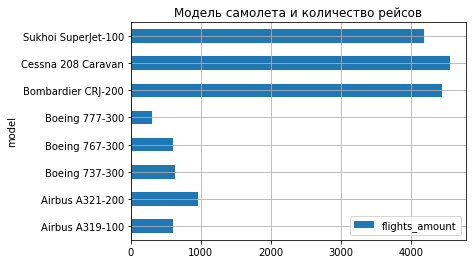

In [8]:
#построим графики модели самолетов и количество рейсов
model_flights.plot(x='model',y='flights_amount' ,kind = 'barh',grid=True)
plt.title('Модель самолета и количество рейсов')
plt.show()

In [9]:
#построим график топ-10 городов и количество рейсов
top_city_flights = top_city_flights.head(10)

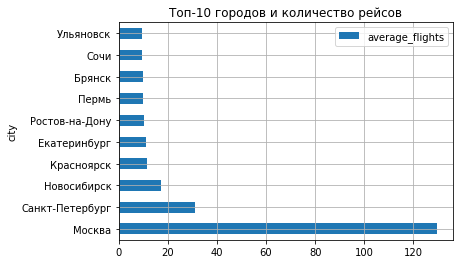

In [10]:
top_city_flights.plot(x='city',y='average_flights' ,kind = 'barh',grid=True)
plt.title('Топ-10 городов и количество рейсов')
plt.show()

Ожидаемо, что Москва впереди — это транспортный пул в любое время года. Питер и Новосибирск занимают 2 и 3 место, что тоже ожидаемо, т.к. крупные города. Количество рейсов у остальных отличается незначительно

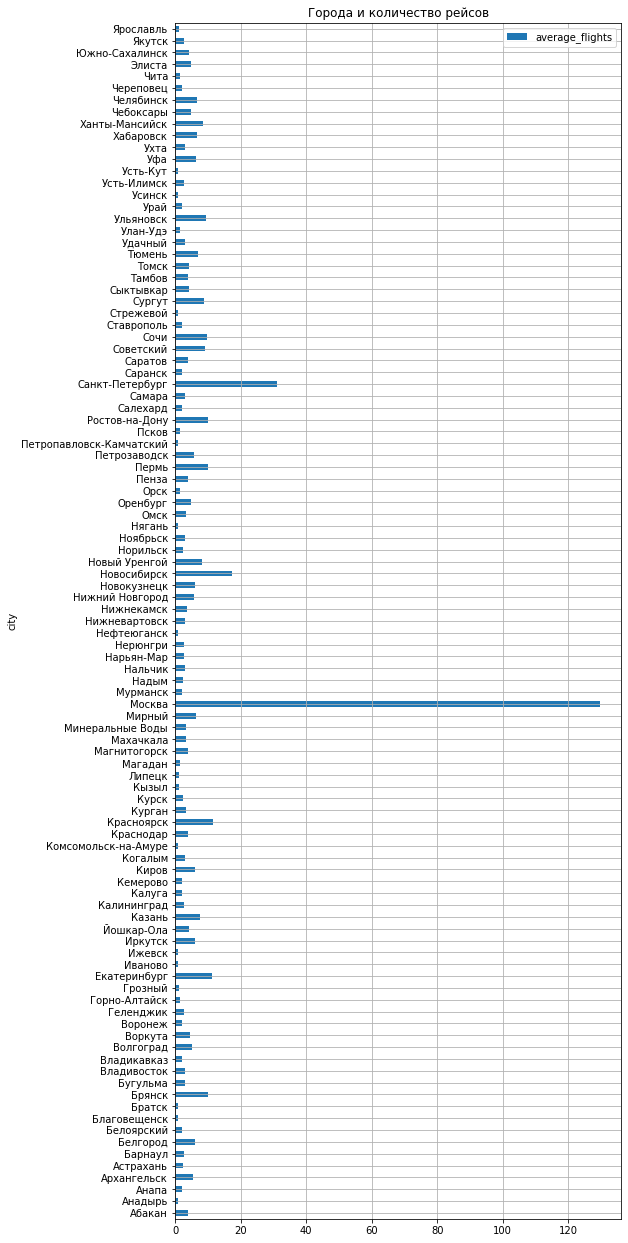

In [11]:
#построим график городов и количество рейсов
city_flights.plot(x='city',y='average_flights' ,kind = 'barh',grid=True,figsize=(8,22))
plt.title('Города и количество рейсов')
plt.show()

Общий вывод:

1. Изучили данные по количеству перелетов за сентябрь 2018г. по каждой модели самолета, выяснили, что самыми используемыми моделями самолета (в сентябре 2018г.) являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100;
2. Москва заметно лидирует по количеству рейсов, в 4 раза больше чем в Санкт-Петербурге (который занимает 2 место по количеству рейсов)